In [1]:
!pip install japanize-matplotlib

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120258 sha256=086e20d32b1e2a8f8edbb58da14ce80addbe277363b5152c4ffc3a8098f8eaef
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
from keras.datasets import cifar10, cifar100

In [4]:
#cifar10 x, y
(x_train, y_train), (x_test, y_test) =cifar10.load_data()
x_train, x_test =  x_train/255.0, x_test/255.0
print(f"学習データ（問題画像）　： {x_train.shape}")
print(f"テストデータ（問題画像）　： {x_test.shape}")

#cifar100 xxx, yyy
(xxx_train, yyy_train), (xxx_test, yyy_test) =cifar100.load_data()
xxx_train, xxx_test =  xxx_train/255.0, xxx_test/255.0
print(f"学習データ（問題画像）　： {xxx_train.shape}")
print(f"テストデータ（問題画像）　： {xxx_test.shape}")

170498071/170498071 [==============================] - 4s 0us/step
学習データ（問題画像）　： (50000, 32, 32, 3)
テストデータ（問題画像）　： (10000, 32, 32, 3)
169001437/169001437 [==============================] - 18s 0us/step
学習データ（問題画像）　： (50000, 32, 32, 3)
テストデータ（問題画像）　： (10000, 32, 32, 3)


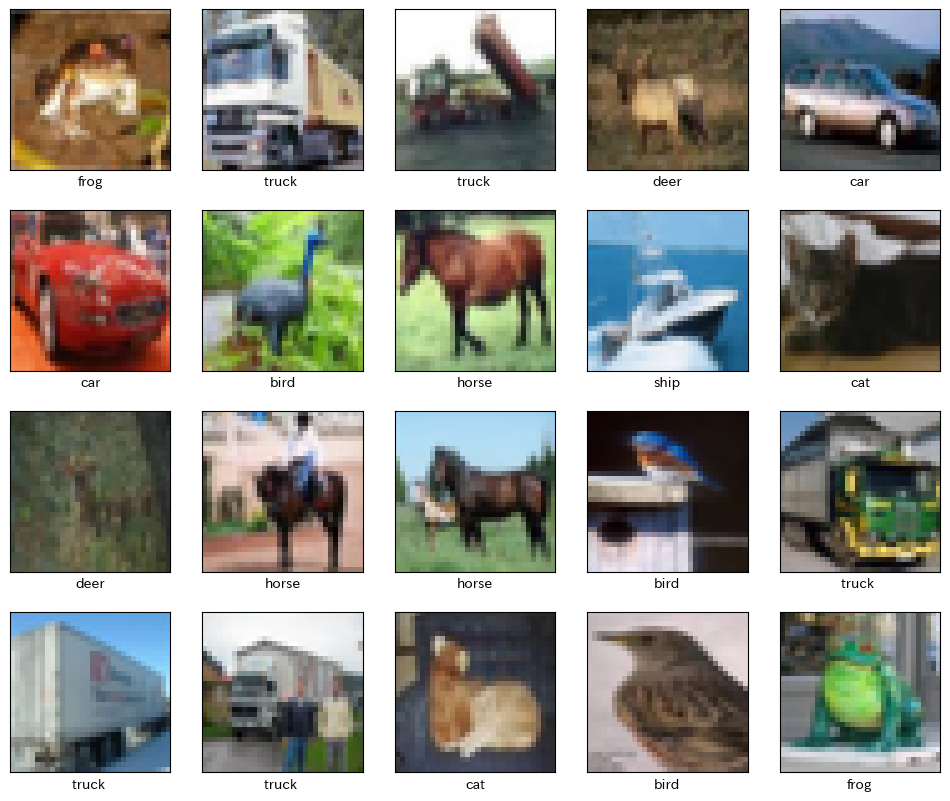

In [5]:
class_names = ["airplane", "car", "bird" , "cat", "deer",
               "dog", "frog", "horse", "ship", "truck "]

n_rows      = 4
n_columns   = 5
def display_data(x_data, y_data):
  plt.figure(figsize =(12,10))
  rows = n_rows
  columns  = n_columns
  for i in range(rows*columns):
    plt.subplot(rows, columns, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_data[i])
    plt.xlabel(class_names[y_data[i][0]])
  plt.show()
display_data(x_train, y_train)


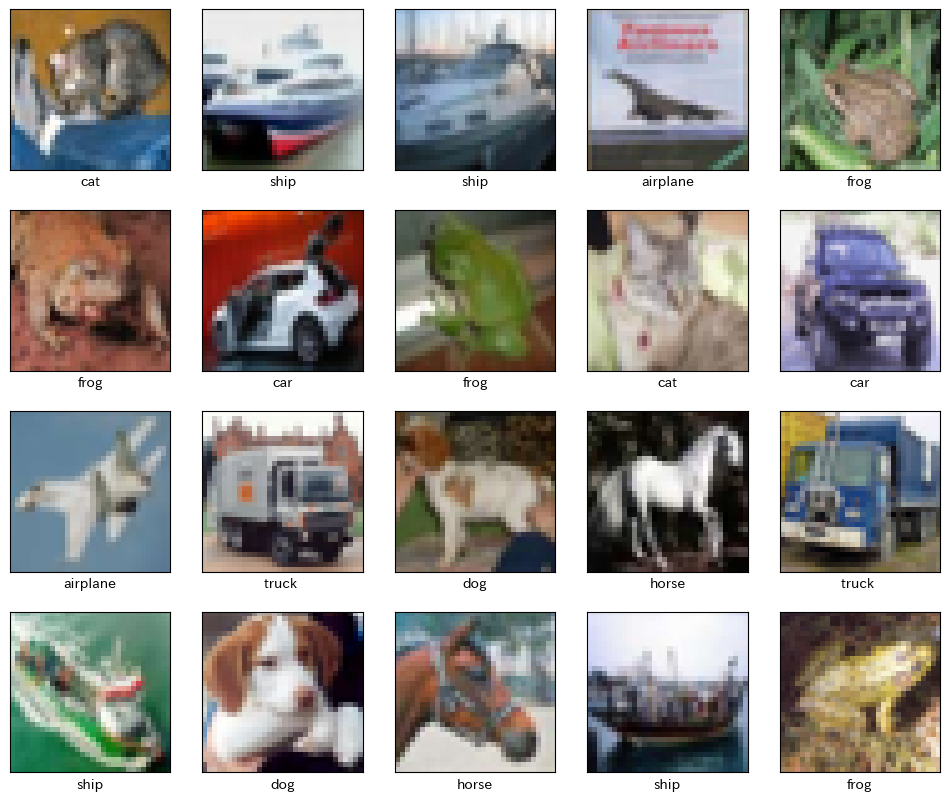

In [6]:
# 答え
display_data(x_test, y_test)

In [7]:
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape = (32,32,3)))  # 32*32*3の画像データ（3次元配データを3072個の1次元データに変換）　入力層
model.add(layers.Dense(128, activation="relu")   )  #128個の中間層
model.add(layers.Dense(10, activation="softmax")     ) #10個(0~9の数字)の出力層
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer="adam",                           #?What is Adam
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/50
1563/1563 [==============================] - 11s 4ms/step - loss: 1.9168 - accuracy: 0.3111 - val_loss: 1.8343 - val_accuracy: 0.3323
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7733 - accuracy: 0.3647 - val_loss: 1.7531 - val_accuracy: 0.3649
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7252 - accuracy: 0.3800 - val_loss: 1.6927 - val_accuracy: 0.3924
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6954 - accuracy: 0.3927 - val_loss: 1.6809 - val_accuracy: 0.3952
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6772 - accuracy: 0.3978 - val_loss: 1.7245 - val_accuracy: 0.3858
Epoch 6/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.6630 - accuracy: 0.4035 - val_loss: 1.6486 - val_accuracy: 0.4054
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6446 - accuracy: 0.4107 - val_loss: 1.6332 - val_accuracy

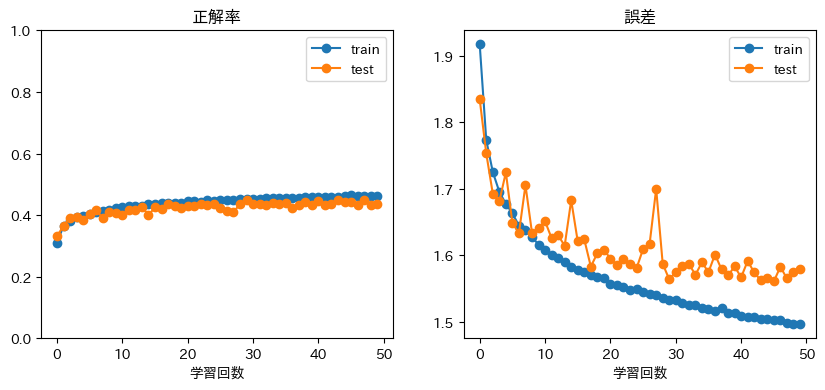

In [9]:
param = [["正解率" , "accuracy" , "val_accuracy"],
          ["誤差","loss" , "val_loss"]]

plt.figure(figsize=(10,4))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.title(param[i][0])      #
  plt.plot(history.history[param[i][1]] , "o-")
  plt.plot(history.history[param[i][2]] , "o-")
  plt.xlabel("学習回数")
  plt.legend(["train","test"] , loc ="best")
  if i==0:
    plt.ylim([0,1])
plt.show()

313/313 [==============================] - 1s 2ms/step


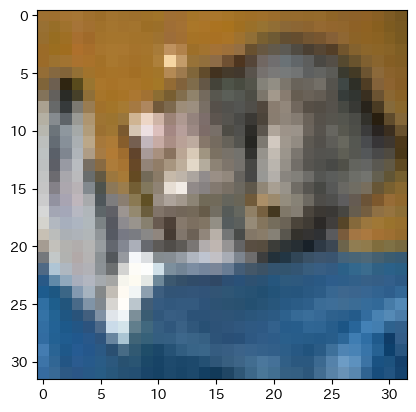

In [10]:
pre = model.predict(x_test)

i = 0
plt.imshow(x_test[i])
plt.show()

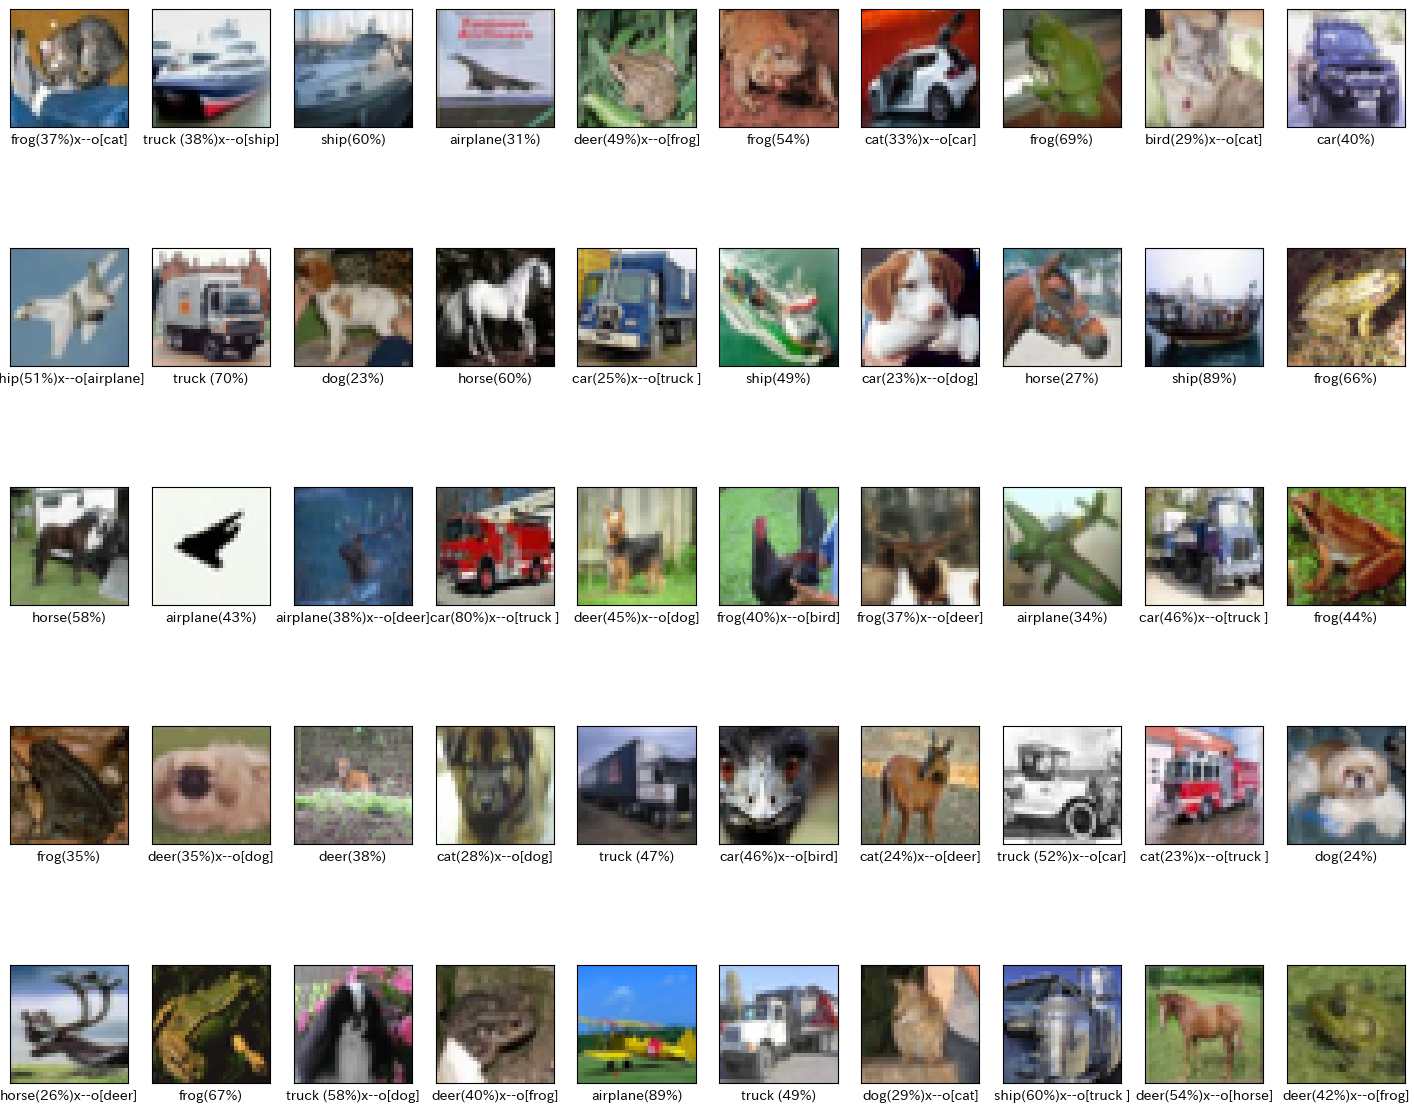

In [13]:
n_rows      =  5
n_columns   = 10
plt.figure(figsize=(18,15))
for i in range(n_rows*n_columns):
  plt.subplot(n_rows, n_columns, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap ="Greys")
  #
  index= np.argmax(pre[i])
  pct  = pre[i][index]
  ans  = ""
  if index != y_test[i]:
    ans = "x--o["+class_names[(y_test[i][0])]+"]"
  lbl = f"{class_names[index]}({pct:.0%}){ans}"
  plt.xlabel(lbl)
plt.show()